<a href="https://colab.research.google.com/github/Mahjabeenqamar1/Machain-Learning/blob/main/TSF_with_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Time Series Forecasting with ARIMA

In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
246 2023-05-09  108.779999  110.595001  107.724998  107.940002  107.940002   
247 2023-05-10  108.550003  113.510002  108.480003  112.279999  112.279999   
248 2023-05-11  115.860001  118.440002  114.930000  116.900002  116.900002   
249 2023-05-12  117.000000  118.260002  116.550003  117.919998  117.919998   
250 2023-05-15  116.489998  118.794998  116.480003  116.959999  116.959999   

       Volume  
246  24782400  
247  47533500  
248  57115100  
249  31272500  
250  22086200  


In [2]:
data = data[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-05-16  114.792503
1 2022-05-17  116.701500
2 2022-05-18  112.401001
3 2022-05-19  110.745499
4 2022-05-20  109.313004


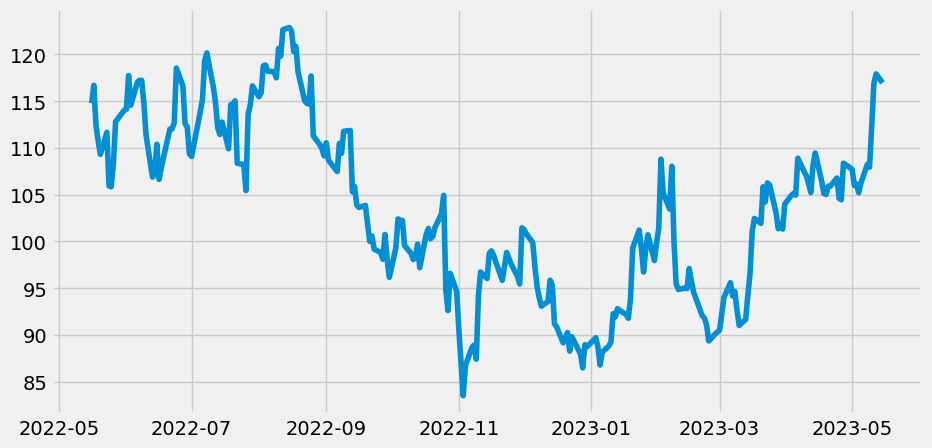

In [3]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))
plt.plot(data["Date"], data["Close"])

Using ARIMA for Time Series Forecasting

In [4]:
!pip install --upgrade statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5


<Figure size 640x480 with 0 Axes>

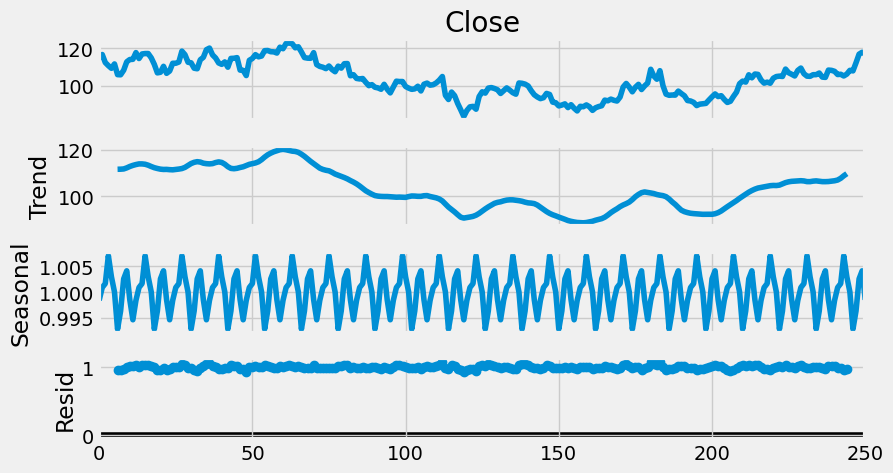

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative', period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10, 5)


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

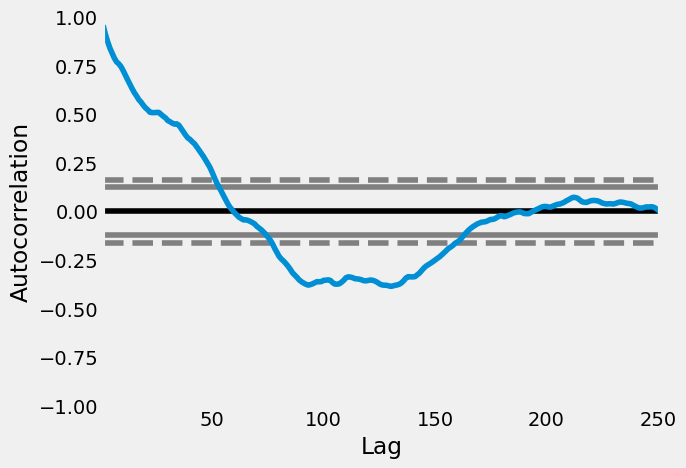

In [6]:
pd.plotting.autocorrelation_plot(data["Close"])

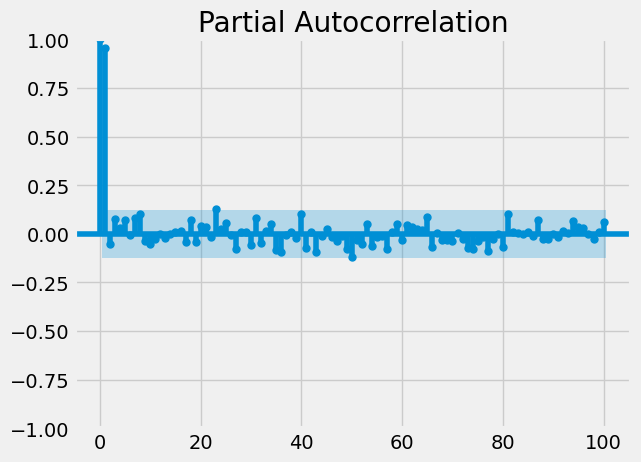

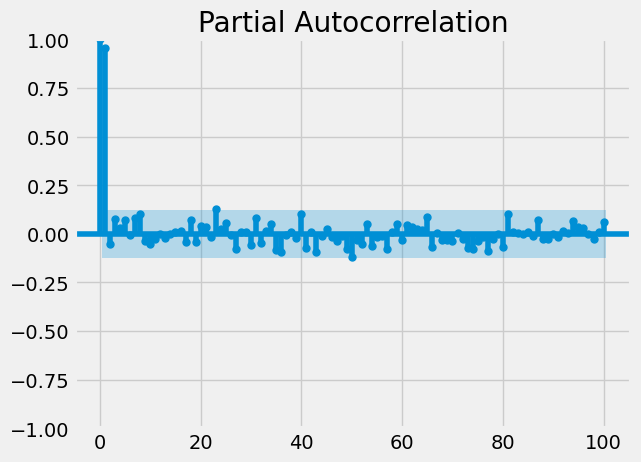

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [8]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 5, 1, 2
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
print(fitted.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -584.321
Date:                Tue, 16 May 2023   AIC                           1184.641
Time:                        12:04:00   BIC                           1212.813
Sample:                             0   HQIC                          1195.979
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0236      0.727      0.032      0.974      -1.402       1.449
ar.L2          0.7058      0.730      0.967      0.334      -0.725       2.137
ar.L3         -0.0262      0.110     -0.239      0.8

In [9]:
predictions = fitted.predict()
print(predictions)

0        0.000000
1      114.792513
2      116.727768
3      112.186911
4      111.035609
          ...    
246    108.189496
247    107.729904
248    112.285508
249    116.369314
250    117.292690
Name: predicted_mean, Length: 251, dtype: float64


In [10]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -573.897
Date:                            Tue, 16 May 2023   AIC                           1177.795
Time:                                    12:05:26   BIC                           1229.879
Sample:                                         0   HQIC                          1198.786
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2630      0.581     -0.453      0.651      -1.402       0.876
ar.L2          0.4840      0.488   

In [11]:
predictions = model.predict(len(data), len(data)+10)
print(predictions)

251    116.237650
252    116.482747
253    115.342166
254    115.215673
255    116.794313
256    115.919185
257    115.623765
258    115.348702
259    116.098532
260    117.479748
261    117.148268
Name: predicted_mean, dtype: float64


<Axes: >

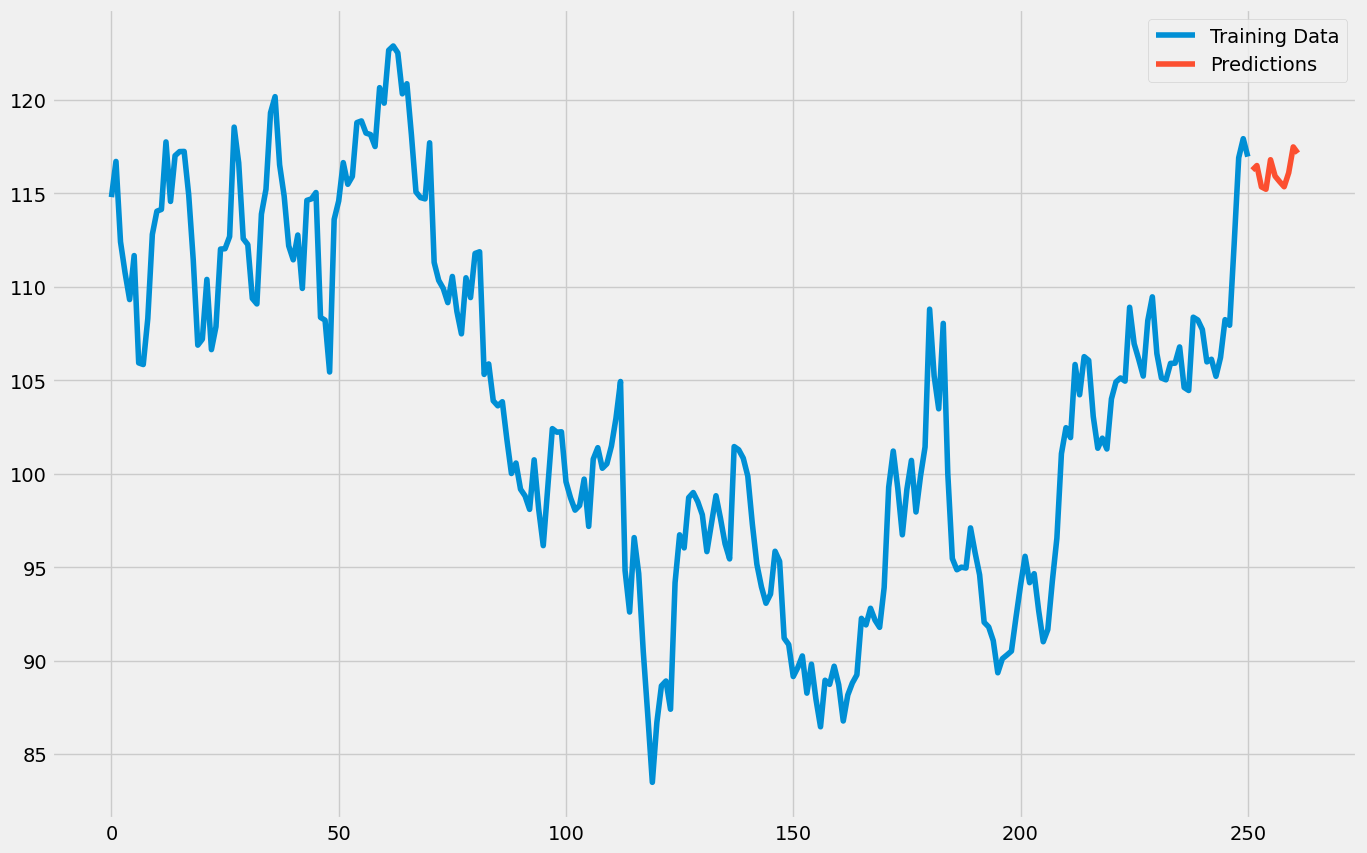

In [12]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")